In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv("credit_customers.csv",encoding = "utf-8")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.shape

(1000, 21)

There are total 1000 datapoints, and we will be using 10% for testing and 90% for training

In [ ]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

Duration, Credit Amount, Installment Commitment, Residence Since, age, existing credits and num of dependents are numerical values. Rest are categorical data

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

No Null Values, which is good, therefore we dont need to create of remove data

In [ ]:
df.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

It is a binary classification problem.
These are all the unique values in each columns


## Category wise Distribution

#### Checking Status

In [ ]:
import matplotlib.gridspec as gridspec
def plot_count_plots(dataframe, category_column):
    """
    Plot subplots of count plots for each unique category in the specified column.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the categorical data.
        category_column (str): The name of the column with categorical data.

    Returns:
        None
    """

    # Calculate the number of rows and columns for the subplots
    num_rows = 3
    num_cols = 6
    max_category_length = 200
    fig_width = 4 + (max_category_length * 0.35)
    fig_height = 2.5 + (num_rows * 1.5)
    plt.figure(figsize=(fig_width, fig_height))

    # fig = plt.figure(figsize=(18, 10))
    gs = gridspec.GridSpec(num_rows, num_cols)

    # Loop through each category and plot the count plot
    for i, category in enumerate(category_column):

        ax = plt.subplot(gs[i])
        ax = sns.countplot(x=category, data=dataframe,
                      palette='viridis', ax=ax)
        ax.set_title(f'Category {category}')
        ax.set_xlabel(category)
        ax.set_ylabel('Count')

        # Add count values on top of each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()

In [ ]:
columns_to_plot = ['checking_status','credit_history','purpose','savings_status','employment','installment_commitment','personal_status','other_parties','residence_since','property_magnitude',\
                   'other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class']

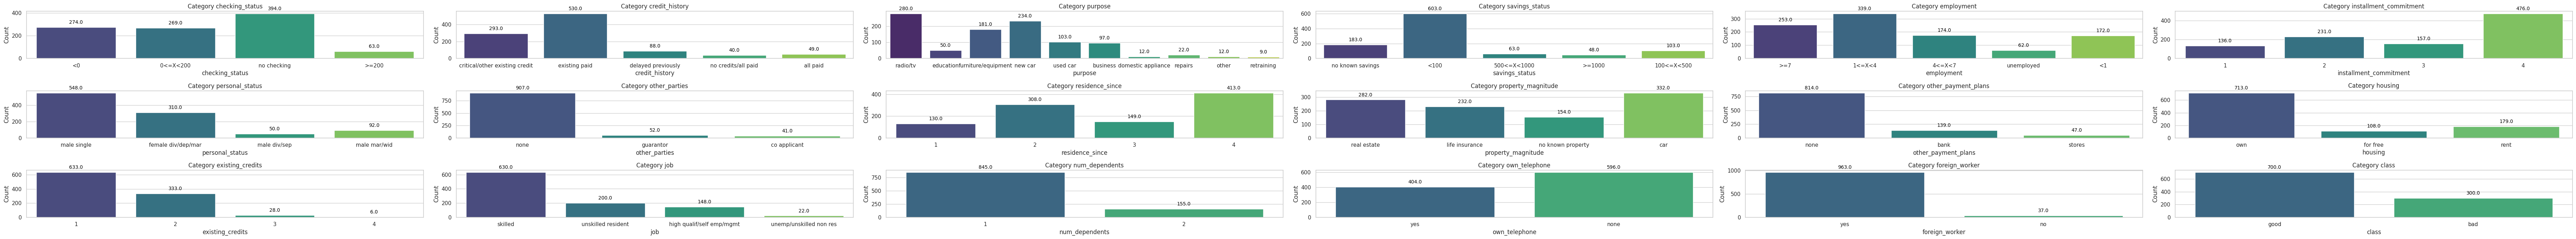

In [ ]:
plot_count_plots(df, columns_to_plot)

From closing observing each graph, I can conclude that the dataset is imbalances for all the categories.
The output variable is imbalanced. Lets observe comparing it to the target

In [ ]:
import matplotlib.gridspec as gridspec
def plot_count_plots(dataframe, category_column,target_column):
    """
    Plot subplots of count plots for each unique category in the specified column.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the categorical data.
        category_column (str): The name of the column with categorical data.

    Returns:
        None
    """

    # Calculate the number of rows and columns for the subplots
    num_rows = 3
    num_cols = len(category_column)*2
    max_category_length = 200
    fig_width = 4 + (max_category_length * 0.35)
    fig_height = 2.5 + (num_rows * 1.5)
    plt.figure(figsize=(fig_width, fig_height))

    # fig = plt.figure(figsize=(18, 10))
    gs = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols)

    # Loop through each category and plot the count plot
    for i, category in enumerate(category_column):

        ax1 = plt.subplot(gs[i * 2])
        ax1 = sns.countplot(x=category, data=dataframe,
                      palette='viridis', ax=ax1)
        ax1.set_title(f'Category {category}')
        ax1.set_xlabel(category)
        ax1.set_ylabel('Count')

        # Add count values on top of each bar
        for p in ax1.patches:
            ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

        # Second subplot: Count plot comparing to the target category
        ax2 = plt.subplot(gs[i * 2 + 1], sharey=ax1)
        sns.countplot(x=category, data=dataframe,
                      palette='viridis',hue = target_column, ax=ax2)
        ax2.set_title(f'Category {category} vs Target')
        ax2.set_xlabel(category)
        ax2.set_ylabel('Count')

        # Add count values on top of each bar
        for p in ax2.patches:
            ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()

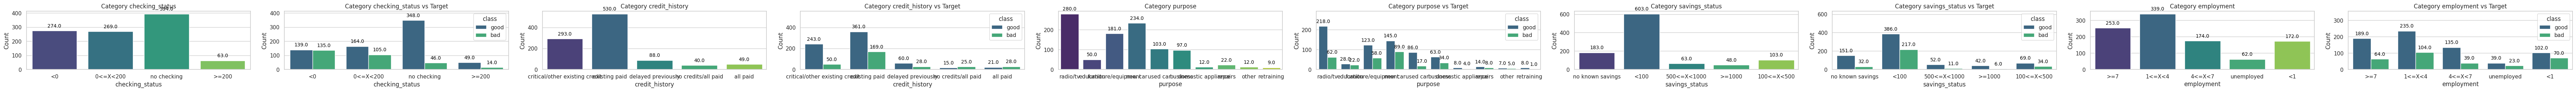

In [ ]:
plot_count_plots(df, columns_to_plot[:5],'class')

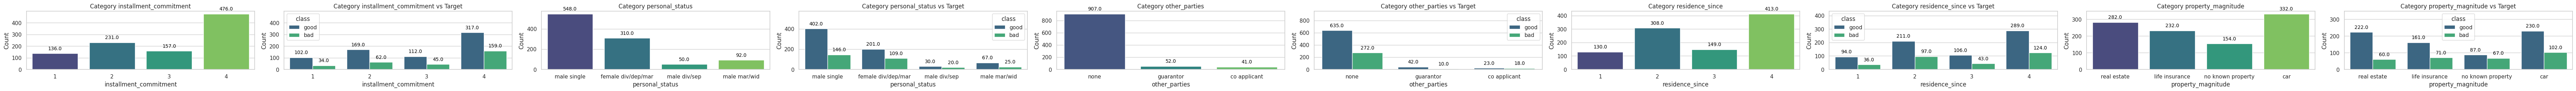

In [ ]:
plot_count_plots(df, columns_to_plot[5:10],'class')

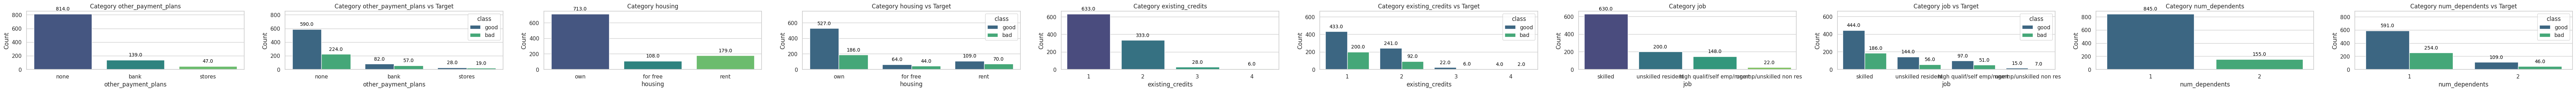

In [ ]:
plot_count_plots(df, columns_to_plot[10:15],'class')

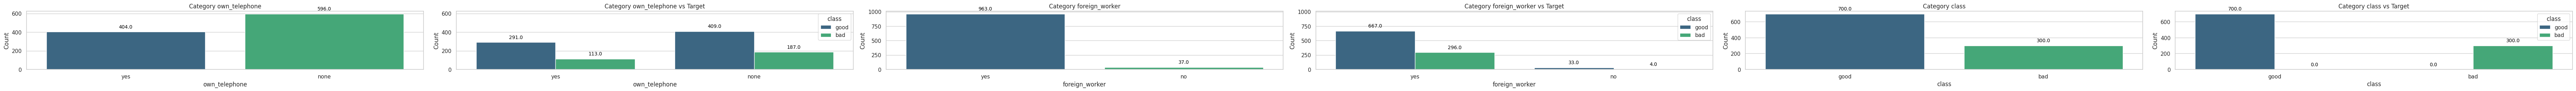

In [ ]:
plot_count_plots(df, columns_to_plot[15:],'class')

On looking at the ratio of Good and Bad, they pretty much are in the ratio of 3:1 or 3:2, the ones which will be having 3:2 ratio will be impacting more  